In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


In [13]:
#simulate data
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

#train model
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [15]:
#predict probabilities
y_probs = model.predict_proba(X)[:,1]

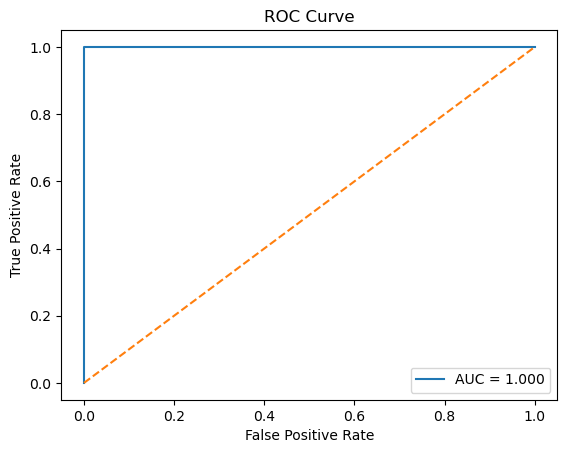

In [17]:
# compute ROC
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc = roc_auc_score(y, y_probs)
#plot
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [19]:
for thresh in [0.1, 0.3, 0.5, 0.7, 0.9]:
    y_pred_thresh = (y_probs > thresh).astype(int)
    print(f"\nThreshold {thresh}")
    print("Predicted positives:", y_pred_thresh.sum())



Threshold 0.1
Predicted positives: 128

Threshold 0.3
Predicted positives: 110

Threshold 0.5
Predicted positives: 97

Threshold 0.7
Predicted positives: 84

Threshold 0.9
Predicted positives: 62


# ROC Curve & AUC

## Objective
This notebook evaluates classifier performance across varying decision thresholds using the Receiver Operating Characteristic (ROC) curve.

---

## Key Concepts

**True Positive Rate (TPR / Recall)**  
Fraction of actual positives correctly identified.

**False Positive Rate (FPR)**  
Fraction of actual negatives incorrectly classified as positives.

---

## ROC Curve
Plots TPR vs FPR across all classification thresholds, illustrating the tradeoff between sensitivity and false alarm rate.

---

## AUC (Area Under Curve)
Quantifies classifier performance:

- 0.5 → Random classifier
- 1.0 → Perfect classifier

Higher AUC indicates better discrimination ability.
